In [1]:
import requests
import time
import json
import pandas as pd
import numpy as np
import re
import pickle
import os
from warnings import warn
from datetime import datetime, date

## Исследование заработной платы по описанию вакансии
На этом занятии будем исследовать данные с HH. Для этого нам пригодится [HH API](https://dev.hh.ru/).

#### Получим ID 2000 вакансий

In [2]:
# если мы не хотим всматриваться в содержимое ячеек, а просто быстро исполнить код
if 'ids' in globals():
    pass
elif os.path.exists('tmp/ids.pickle'):
    with open('ids.pickle', 'rb') as infile:
        ids = pickle.load(infile)
else:
    params = {
        'text': 'NAME:Аналитик',  # в имени должно быть слово "Аналитик"
        'area': 1,  # поиск ощуществляется по вакансиям города Москва
        'page': 0,  # индекс страницы поиска на HH
        'per_page': 100,  # кол-во вакансий на 1 странице
        'only_with_salary': 'true'  # берем только те вакансии, где указана заработная плата
    }
    
    ids = []
    
    while True:
        request = requests.get('https://api.hh.ru/vacancies/', params)
        page = request.content.decode() # декодируем из байтов в текст
        request.close()
        
        page_dict = json.loads(page)
        ids_ = [dct['id'] for dct in page_dict['items']]
    
        print(f'on page {params["page"]} {len(ids_)} vacancies found')
    
        # break loop if len(ids_) == 0
        if len(ids_) == 0:
            break
        else:
            ids.extend([dct['id'] for dct in page_dict['items']])
            params['page'] += 1
            time.sleep(0.5)

    with open('/tmp/ids.pickle', 'wb') as outfile:
        pickle.dump(ids, outfile)

In [ ]:
params = {
    'text': 'NAME:Аналитик',  # в имени должно быть слово "Аналитик"
    'area': 1,  # поиск ощуществляется по вакансиям города Москва
    'page': 0,  # индекс страницы поиска на HH
    'per_page': 100,  # кол-во вакансий на 1 странице
    'only_with_salary': 'true'  # берем только те вакансии, где указана заработная плата
}

ids = []

while True:
    request = requests.get('https://api.hh.ru/vacancies/', params)
    page = request.content.decode() # декодируем из байтов в текст
    request.close()
    
    page_dict = json.loads(page)
    ids_ = [dct['id'] for dct in page_dict['items']]

    print(f'on page {params["page"]} {len(ids_)} vacancies found')

    # break loop if len(ids_) == 0
    if len(ids_) == 0:
        break
    else:
        ids.extend([dct['id'] for dct in page_dict['items']])
        params['page'] += 1
        time.sleep(0.5)

In [ ]:
with open('/tmp/ids.pickle', 'wb') as outfile:
    pickle.dump(ids, outfile)

In [ ]:
# with open('ids.pickle', 'rb') as infile:
#     ids = pickle.load(infile)

#### Получим данные по каждой вакансии

In [4]:
len(ids)

1746

In [73]:
from fiona as 

In [75]:
del open

In [6]:
(1746 * 0.5) / 60

14.55

In [10]:
main_host = 'https://api.hh.ru'  # host of HH.API
entity = 'vacancies'  # сущность, по которой мы ищем

vacancies = []

ids_count = len(ids)
time_init = datetime.now()

for index, id_ in enumerate(ids):
    # load vacancy info
    response = requests.get(f'{main_host}/{entity}/{id_}')
    
    if response.status_code == 200:
        response_content = response.content.decode()  # response.json()
        response_dict = json.loads(response_content)
        
        vacancies.append(response_dict)
        
    else:
        message = f'Request finished with exit code {response.status_code}.'
        warn(message)

        vacancies.append({})  # {'id': None}

    # logs
    if index % 10 == 0:
        time_between = datetime.now()
        delta = time_between - time_init  # class timedelta
        delta_seconds_total = delta.seconds
        
        delta_minutes = delta_seconds_total // 60
        delta_seconds = delta_seconds_total % 60
        
        print(f'{len(vacancies)}/{ids_count} processed, {delta_minutes} minutes and {delta_seconds} seconds passed...')
    
    time.sleep(0.5)

1/1746 processed, 0 minutes and 0 seconds passed...
11/1746 processed, 0 minutes and 6 seconds passed...
21/1746 processed, 0 minutes and 12 seconds passed...
31/1746 processed, 0 minutes and 18 seconds passed...
41/1746 processed, 0 minutes and 24 seconds passed...
51/1746 processed, 0 minutes and 30 seconds passed...
61/1746 processed, 0 minutes and 36 seconds passed...
71/1746 processed, 0 minutes and 42 seconds passed...
81/1746 processed, 0 minutes and 48 seconds passed...
91/1746 processed, 0 minutes and 54 seconds passed...
101/1746 processed, 1 minutes and 0 seconds passed...
111/1746 processed, 1 minutes and 6 seconds passed...
121/1746 processed, 1 minutes and 12 seconds passed...
131/1746 processed, 1 minutes and 18 seconds passed...
141/1746 processed, 1 minutes and 24 seconds passed...
151/1746 processed, 1 minutes and 32 seconds passed...
161/1746 processed, 1 minutes and 38 seconds passed...
171/1746 processed, 1 minutes and 44 seconds passed...
181/1746 processed, 1 min

/var/folders/h6/lv17v1r10lz21g745pd6774h0tgc4z/T/ipykernel_5887/2360980563.py:20: UserWarning: Request finished with exit code 404.
  warn(message)


241/1746 processed, 2 minutes and 27 seconds passed...
251/1746 processed, 2 minutes and 33 seconds passed...
261/1746 processed, 2 minutes and 39 seconds passed...
271/1746 processed, 2 minutes and 46 seconds passed...
281/1746 processed, 2 minutes and 52 seconds passed...
291/1746 processed, 2 minutes and 58 seconds passed...
301/1746 processed, 3 minutes and 4 seconds passed...
311/1746 processed, 3 minutes and 10 seconds passed...
321/1746 processed, 3 minutes and 16 seconds passed...
331/1746 processed, 3 minutes and 22 seconds passed...
341/1746 processed, 3 minutes and 28 seconds passed...
351/1746 processed, 3 minutes and 34 seconds passed...
361/1746 processed, 3 minutes and 41 seconds passed...
371/1746 processed, 3 minutes and 47 seconds passed...
381/1746 processed, 3 minutes and 53 seconds passed...
391/1746 processed, 3 minutes and 59 seconds passed...
401/1746 processed, 4 minutes and 5 seconds passed...
411/1746 processed, 4 minutes and 12 seconds passed...
421/1746 pro

In [35]:
t1 = datetime.now()

In [36]:
t2 = datetime.now()

In [37]:
td = t2 - t1

In [38]:
td

datetime.timedelta(seconds=6, microseconds=966809)

In [13]:
with open('tmp/vacancies.pickle', 'wb') as outfile:
    pickle.dump(vacancies, outfile)

In [2]:
with open('tmp/vacancies.pickle', 'rb') as infile:
    vacancies = pickle.load(infile)

In [3]:
salary_params = ['from', 'to', 'currency', 'gross']
address_params = ['lat', 'lng']

def process_vacancy(vacancy_dict: dict) -> dict:
    vacancy_processed = {}

    # id
    vacancy_processed['id'] = vacancy_dict.get('id')

    # response_letter_required
    vacancy_processed['response_letter_required'] = vacancy_dict.get('response_letter_required')

    # salary
    salary_exists = vacancy_dict.get('salary') is not None
    
    for sp in salary_params:
        if salary_exists:
            vacancy_processed[f'salary_{sp}'] = vacancy_dict['salary'].get(sp)
        else:
            vacancy_processed[f'salary_{sp}'] = None

    # address
    address_exists = vacancy_dict.get('address') is not None
    
    for ap in address_params:
        if address_exists:
            vacancy_processed[f'address_{ap}'] = vacancy_dict['address'].get(ap)
        else:
            vacancy_processed[f'address_{ap}'] = None

    # key_skills
    key_skills_exists = vacancy_dict.get('key_skills') is not None

    if key_skills_exists:
        vacancy_processed['key_skills'] = [skill['name'] for skill in vacancy_dict['key_skills']]
    else:
        vacancy_processed['key_skills'] = None

    return vacancy_processed

In [4]:
vacancies_processed = [process_vacancy(v) for v in vacancies]

#### Обработка данных

In [5]:
# vacancies_df = pd.DataFrame(vacancies_processed)
# vacancies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1744 non-null   object 
 1   response_letter_required  1744 non-null   object 
 2   salary_from               1399 non-null   float64
 3   salary_to                 1046 non-null   float64
 4   salary_currency           1735 non-null   object 
 5   salary_gross              1734 non-null   object 
 6   address_lat               955 non-null    float64
 7   address_lng               955 non-null    float64
 8   key_skills                1744 non-null   object 
dtypes: float64(4), object(5)
memory usage: 122.9+ KB


In [8]:
vacancies_df.to_excel('tmp/vacancies_df.xlsx', index=None)

In [2]:
vacancies_df = pd.read_excel('tmp/vacancies_df.xlsx').dropna(subset=['id', 'salary_gross'])
vacancies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 0 to 1745
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1734 non-null   float64
 1   response_letter_required  1734 non-null   float64
 2   salary_from               1398 non-null   float64
 3   salary_to                 1046 non-null   float64
 4   salary_currency           1734 non-null   object 
 5   salary_gross              1734 non-null   float64
 6   address_lat               953 non-null    float64
 7   address_lng               953 non-null    float64
 8   key_skills                1734 non-null   object 
dtypes: float64(7), object(2)
memory usage: 135.5+ KB


In [16]:
vacancies_df.head()

,id,response_letter_required,salary_from,salary_to,salary_currency,salary_gross,address_lat,address_lng,key_skills
0,88603203.0,1.0,NaN,60000.0,RUR,1.0,55.746593,37.537371,"['SQL', 'Python']"
1,81879828.0,0.0,300000.0,NaN,RUR,1.0,NaN,NaN,[]
2,88629159.0,0.0,NaN,56000.0,RUR,1.0,NaN,NaN,[]
3,88587403.0,0.0,NaN,70000.0,RUR,1.0,55.971663,37.491602,[]
4,88564624.0,0.0,80000.0,NaN,RUR,0.0,55.803479,37.390514,"['SQL', 'Power BI', 'MS PowerPoint', 'Работа с..."


In [ ]:
# ЗАМЕТКА
# пропущенные значения для разных переменных находятся в разных местах. Сколько останется наблюдений, если оставить только "полные"
# строки?

In [20]:
vacancies_df.dropna().shape

(392, 9)

In [ ]:
# РАБОТА С ПРОПУЩЕННЫМИ ЗНАЧЕНИЯМИ: ОБЫЧНЫЙ DROPNA НЕ ПОДХОДИТ

**Подготовим целевую переменную**

In [3]:
(vacancies_df['salary_from'].notna() & vacancies_df['salary_to'].notna()).sum()

710

In [ ]:
# что делать с salary_from и salary_to?

# 1) Усреднить там, где есть оба значения
#   + оптимальная метрика
#   - останется меньше 50% значений

# 2) Оставить одну колонку (там, где меньше всего пропущенных значений)
#   + значений будет больше по сравнению с предыдущим вариантом
#   - само наличие "верхней границы" [исключащее или] "нижней границы" - признак

# 3) Экстраполяция одного значения по другому
#   - это рискованно - мы сами "додумываем" данные
#   + это интересно и познавательно

# ПЛАН
#1 попробуем заместить пропущенные значения с помощью эвристики (простой алгоритм aka baseline)
#2 попробуем ML (Linear Regression, Random Forest Regression, Gradient Boosting Regression)
#3 сравнить качество и выбрать наилучший способ

In [23]:
vacancies_df['salary_currency'].value_counts()

salary_currency
RUR    1708
USD      25
EUR       2
Name: count, dtype: int64

In [ ]:
# как итерировать по строкам датафрейма?

In [10]:
vacancies_df.head()

,id,response_letter_required,salary_from,salary_to,salary_currency,salary_gross,address_lat,address_lng,key_skills
0,88603203.0,1.0,NaN,60000.0,RUR,1.0,55.746593,37.537371,"['SQL', 'Python']"
1,81879828.0,0.0,300000.0,NaN,RUR,1.0,NaN,NaN,[]
2,88629159.0,0.0,NaN,56000.0,RUR,1.0,NaN,NaN,[]
3,88587403.0,0.0,NaN,70000.0,RUR,1.0,55.971663,37.491602,[]
4,88564624.0,0.0,80000.0,NaN,RUR,0.0,55.803479,37.390514,"['SQL', 'Power BI', 'MS PowerPoint', 'Работа с..."


#### Немного про эффективную итерацию по строкам

In [ ]:
# input and output of FUN

# pd.Series.apply(FUN)/map(FUN)
    # input: element of pd.Series
    # output: result of applying function to element of pd.Series

# pd.DataFrame.apply
    # input: pd.Series
    # output: scalar value -> pd.Series
    #         pd.Series    -> pd.DataFrame

# pd.DataFrameGroupBy.apply
    # input: pd.DataFrame
    # output: pd.DataFrame -> pd.DataFrame
    #         pd.Series    -> pd.DataFrame
    #         scalar       -> pd.Series

# pd.DataFrameGroupBy.agg/aggregate
    # input: pd.Series
    # output: scalar

In [6]:
vacancies_df.groupby('salary_gross')[['salary_from', 'salary_from']].aggregate(lambda col: col.mean() / 5)

,salary_from,salary_from
salary_gross,,
0.0,23982.766980,23982.766980
1.0,25976.673923,25976.673923


In [31]:
from collections import namedtuple

def convert_gross(series: pd.Series) -> float:  # salary_from/to, salary_gross
    if series['salary_gross']:
        return series.iloc[0] * 0.87
    else:
        return series.iloc[0]

def convert_gross_nt(ntpl: namedtuple) -> float:  # salary_from/to, salary_gross
    if ntpl.salary_gross:
        return ntpl[1] * 0.87
    else:
        return ntpl[1]

In [19]:
%%timeit
_ = vacancies_df[['salary_from', 'salary_gross']].apply(convert_gross, axis=1)

5.93 ms ± 54.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
_ = [convert_gross_nt(ntpl) for ntpl in vacancies_df[['salary_from', 'salary_gross']].itertuples()]

577 µs ± 5.95 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
for ntpl in vacancies_df[['salary_from', 'salary_gross']].itertuples():
    print(ntpl.salary_from)

nan
300000.0
nan
nan
80000.0
74000.0
45000.0
20000.0
80000.0
39000.0
60000.0
60000.0
116000.0
70000.0
50000.0
nan
250000.0
350000.0
100000.0
150000.0
130000.0
150000.0
1200.0
200000.0
40000.0
nan
150000.0
30000.0
100000.0
45000.0
200000.0
100000.0
nan
70000.0
200000.0
70000.0
70000.0
85000.0
250000.0
130000.0
420000.0
nan
170650.0
123000.0
60000.0
nan
20000.0
120000.0
40000.0
70000.0
nan
120000.0
62000.0
nan
80000.0
80000.0
50000.0
200000.0
150000.0
50000.0
80000.0
100000.0
150000.0
nan
90000.0
200000.0
nan
30000.0
70000.0
80000.0
nan
30000.0
35000.0
120000.0
nan
140000.0
nan
nan
60000.0
60000.0
150000.0
70000.0
100000.0
40000.0
100000.0
150000.0
nan
150000.0
160000.0
61000.0
60000.0
120000.0
30000.0
nan
200000.0
nan
nan
90000.0
143550.0
70000.0
150000.0
70000.0
80000.0
200000.0
200000.0
80000.0
60000.0
100000.0
66000.0
100000.0
50000.0
150000.0
100000.0
nan
190000.0
150000.0
nan
110000.0
250000.0
30000.0
nan
70000.0
200000.0
70000.0
nan
nan
40000.0
nan
50000.0
nan
80000.0
80000.0
2700

#### Продолжаем

In [3]:
from currency_converter import CurrencyConverter

rate_date = date(2022, 2, 1)
converter = CurrencyConverter()

In [38]:
converter.convert(100, 'USD', 'RUB', rate_date)

7666.4120781527545

In [4]:
from collections import namedtuple
from currency_converter import CurrencyConverter

RATE_DATE = date(2022, 2, 1)
CONVERTER = CurrencyConverter()

def convert_currency(ntpl: namedtuple) -> float:  # salary_from/to, salary_currency
    if pd.isna(ntpl[1]) or ntpl.salary_currency == 'RUR':
        return ntpl[1]
    else:
        return CONVERTER.convert(ntpl[1], ntpl.salary_currency, 'RUB', RATE_DATE)

In [5]:
vacancies_df['salary_from_c'] = [convert_currency(ntpl) for ntpl in vacancies_df[['salary_from', 'salary_currency']].itertuples()]
vacancies_df['salary_to_c'] = [convert_currency(ntpl) for ntpl in vacancies_df[['salary_to', 'salary_currency']].itertuples()]

vacancies_df = vacancies_df.rename(columns={'salary_from': 'salary_from_old', 'salary_to': 'salary_to_old'})
vacancies_df = vacancies_df.rename(columns={'salary_from_c': 'salary_from', 'salary_to_c': 'salary_to'})

In [6]:
# DO NOT RUN TWICE
vacancies_df.loc[vacancies_df['salary_gross'], 'salary_from'] = vacancies_df.loc[vacancies_df['salary_gross'], 'salary_from'] * 0.87
vacancies_df.loc[vacancies_df['salary_gross'], 'salary_to'] = vacancies_df.loc[vacancies_df['salary_gross'], 'salary_to'] * 0.87

#### Экстраполируем пропущенные значения разными способами
1. Посчитаем среднее соотношение между верхней и нижней границами (на данных, для которых есть обе границы);
2. Проверим качество.

In [7]:
data_target = vacancies_df[vacancies_df['salary_from'].notna() & vacancies_df['salary_to'].notna()].reset_index(drop=True)

y = data_target['salary_from']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def check_algoritm_quality(data, niter=100, train_size=.7):
    metrics = []

    for i in range(niter):
        train, test = train_test_split(data, train_size=train_size)
        mean_ratio = (train['salary_to'] / train['salary_from']).mean()  # function could be moved to argument

        test['salary_to_predict'] = test['salary_from'] * mean_ratio
        
        r2_to = r2_score(test['salary_to'], test['salary_to_predict'])
        
        metrics.append(['algoritm', r2_to])

    return metrics

In [17]:
metrics = check_algoritm_quality(data_target, niter=1000)
metrics_df = pd.DataFrame(metrics, columns=['method', 'r2'])

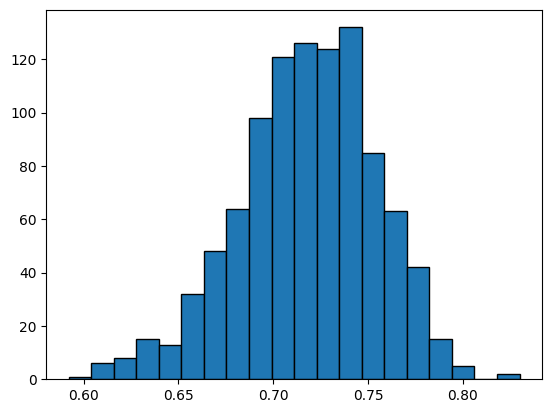

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(metrics_df['r2'], bins=20, edgecolor='black');

In [51]:
train, test = train_test_split(data_target, train_size=0.7)

#### Попробуем ML

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'lr': LinearRegression,
    'rf': RandomForestRegressor,
    'gb': GradientBoostingRegressor
}

# salary_to = salary_from * k + b   LinearRegression

In [22]:
X = data_target[['salary_from']]
y = data_target['salary_to']

niter = 1000

metric_models = []

for i in range(niter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

    for name, model in models.items():
        instance = model()
        instance.fit(X_train, y_train)
        predict = instance.predict(X_test)

        r2_to = r2_score(y_test, predict)

        metric_models.append([name, r2_to])

In [23]:
metric_models_df = pd.DataFrame(metric_models, columns=['method', 'r2'])
metrics_final = pd.concat([metrics_df, metric_models_df])

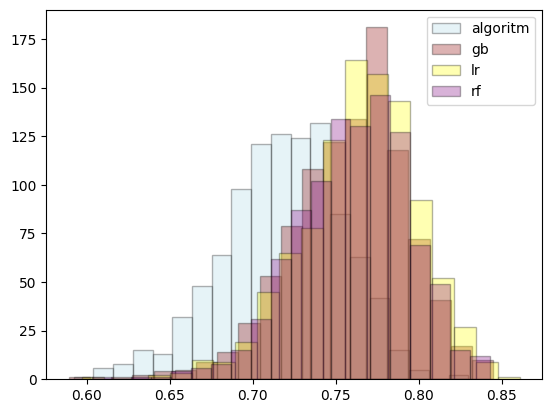

In [28]:
# рассмотрим распределение

cmapper = {
    'algoritm': 'lightblue',
    'lr': 'yellow',
    'rf': 'purple',
    'gb': 'darkred'
}

fig, ax = plt.subplots()

for name, df in metrics_final.groupby('method'):
    color = cmapper[name]
    ax.hist(df['r2'], bins=20, edgecolor='black', color=color, label=name, alpha=.3)

ax.legend();

In [31]:
metrics_final.groupby('method').mean().sort_values(by=['r2'], ascending=False)

,r2
method,
lr,0.764541
rf,0.761232
gb,0.758500
algoritm,0.717922


#### Восстановим пропущенные значения

In [9]:
from sklearn.linear_model import LinearRegression

# copy data in order not to corrupt occasionaly initial dataframe
vacancies_df_final = vacancies_df.copy()

# split data into X, y
X = data_target[['salary_from']]
y = data_target['salary_to']

# initialize models
lr_to = LinearRegression()
lr_from = LinearRegression()

# fit models
lr_to.fit(X, y)
lr_from.fit(pd.DataFrame(y), X['salary_from'])

predict_to = lr_to.predict(vacancies_df_final.loc[vacancies_df_final['salary_to'].isna(), ['salary_from']])
predict_from = lr_from.predict(vacancies_df_final.loc[vacancies_df_final['salary_from'].isna(), ['salary_to']])

vacancies_df_final.loc[vacancies_df_final['salary_to'].isna(), 'salary_to'] = predict_to
vacancies_df_final.loc[vacancies_df_final['salary_from'].isna(), 'salary_from'] = predict_from

vacancies_df_final['target'] = vacancies_df_final[['salary_to', 'salary_from']].mean(axis=1)

<Axes: >

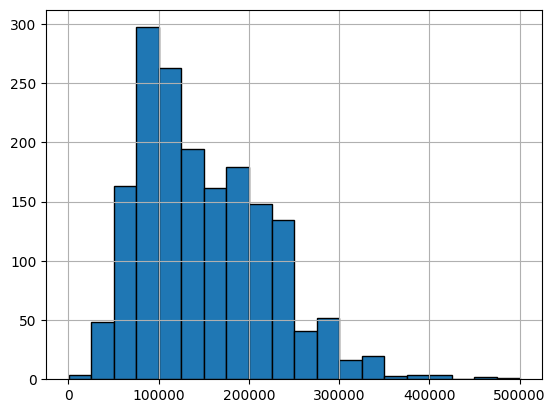

In [10]:
vacancies_df_final['target'].hist(bins=20, edgecolor='black')

**Про измерение качества**

In [66]:
test['salary_to_predict'] = test['salary_from'] * mean_ratio
test['salary_from_predict'] = test['salary_to'] / mean_ratio

# 2 подхода к измерению качества:

#1 считаем абсолютные значения отклонения и сравниваем их для разных моделей: RMSE
#2 считаем относительную метрику от 0 до 1: R2 [0-1], означает процент объясненной дисперсии в Y

# 1
rmse_to = mean_squared_error(test['salary_to'], test['salary_to_predict'], squared=False)
rmse_from = mean_squared_error(test['salary_from'], test['salary_from_predict'], squared=False)

# 2
r2_to = r2_score(test['salary_to'], test['salary_to_predict'])
r2_from = r2_score(test['salary_from'], test['salary_from_predict'])

In [67]:
r2_to, r2_from

(0.7604969178811087, 0.7482565691649892)

In [64]:
rmse_to, rmse_from

(46541.86983227096, 31699.245646936117)

In [57]:
test['salary_to_predict']

526    396422.835883
106     66070.472647
490    293646.545099
17     190870.254314
197    190870.254314
           ...      
150    220234.908824
102     73411.636275
129    275293.636030
605    117458.618039
311     73411.636275
Name: salary_to_predict, Length: 214, dtype: float64

In [58]:
test['salary_to']

526    350000.0
106     45000.0
490    220000.0
17     130000.0
197    180000.0
         ...   
150    350000.0
102     70000.0
129    285000.0
605    120000.0
311     60000.0
Name: salary_to, Length: 214, dtype: float64

#### Готовим финальную модель
Фичи:

- response_letter_required -> int
- address_lat, address_lng -> distance from Moscow center (возьмем в основную модель если есть корреляция)<br>
<b style="color: red;">РЕШЕНИЕ: сама дистанция не связана с таргетом, а вот ее наличие или отсутствие - да. Поэтому берем переменную, которая принимает значение 1, если координаты есть и корректны, и 0 в ином случае</b>

- key_skills -> проверить частотность скиллов

In [11]:
vacancies_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 0 to 1745
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1734 non-null   float64
 1   response_letter_required  1734 non-null   float64
 2   salary_from_old           1398 non-null   float64
 3   salary_to_old             1046 non-null   float64
 4   salary_currency           1734 non-null   object 
 5   salary_gross              1734 non-null   float64
 6   address_lat               953 non-null    float64
 7   address_lng               953 non-null    float64
 8   key_skills                1734 non-null   object 
 9   salary_from               1734 non-null   float64
 10  salary_to                 1734 non-null   float64
 11  target                    1734 non-null   float64
dtypes: float64(10), object(2)
memory usage: 240.6+ KB


In [12]:
def calc_distance(coord1, coord2):
    coords_na = pd.Series(coord1 + coord2).isna().any()

    if not coords_na:
        return distance.distance(coord1, coord2).m
    else:
        return np.nan

In [64]:
from geopy import distance

moscow_center = (55.751244, 37.618423)

model_vars = ['target', 'response_letter_required', 'address_lat', 'address_lng', 'key_skills']
vacancies_df_model = vacancies_df_final[model_vars].copy()

# response_letter_required
vacancies_df_model['response_letter_required'] = vacancies_df_model['response_letter_required'].astype(int)

# address_lat, address_lng
# insert NaNs in place of strange coordinates
vacancies_df_model.loc[vacancies_df_model['address_lat'] == moscow_center[0], 'address_lat'] = np.nan
vacancies_df_model.loc[vacancies_df_model['address_lng'] == moscow_center[1], 'address_lng'] = np.nan

vacancies_df_model['distance'] = [
    calc_distance(moscow_center, tuple(coords))
    for coords
    in vacancies_df_model[['address_lat', 'address_lng']].values.tolist()
]

# log distance variable
vacancies_df_model['distance'] = np.log(vacancies_df_model['distance'].values)
vacancies_df_model['distance_exists'] = vacancies_df_model['distance'].notna().astype(int)

vacancies_df_model = vacancies_df_model.drop(columns=['distance'])

# key_skills
def parser(string) -> list:
    skills = [skill.strip("'") for skill in string.strip('[]').split(', ') if skill != '']

    return skills

vacancies_df_model['key_skills'] = vacancies_df_model['key_skills'].map(parser)

In [49]:
vacancies_df_model.groupby('distance_exists')['target'].mean()

distance_exists
False    161316.332514
True     144493.396215
Name: target, dtype: float64

In [50]:
vacancies_df_model.groupby('distance_exists')['target'].median()

distance_exists
False    153253.432623
True     129110.445877
Name: target, dtype: float64

In [52]:
#1 выдвигали H0 (нулевая гипотеза): разницы на самом деле нет, а то, что мы видим - это случайность
#2 пытались понять, какие вообще значения разницы возможны, если это случайность
#3 считали вероятность получения того значения разности, которое видим в реальности (сейчас считаем с помощью теста)
#4 делали вывод о нулевой гипотеза

# 2 и 3 можно решить математически
from scipy import stats

In [54]:
# непараметрический критерий Манна-Уитни
stats.mannwhitneyu(
    vacancies_df_model.loc[vacancies_df_model['distance_exists'], 'target'],
    vacancies_df_model.loc[~vacancies_df_model['distance_exists'], 'target']
)

# pvalue - это интересующая нас вероятность

MannwhitneyuResult(statistic=326797.0, pvalue=1.0681823646343376e-05)

In [45]:
vacancies_df_model.dropna()[['target', 'distance']].corr()

,target,distance
target,1.000000,0.034038
distance,0.034038,1.000000


In [34]:
# import seaborn as sns

# sns.pairplot(vacancies_df_model)

In [47]:
plot_data['distance'].describe().round()

count        949.0
mean       75673.0
std       658398.0
min          375.0
25%         3702.0
50%         5969.0
75%        11635.0
max      9824491.0
Name: distance, dtype: float64

In [38]:
plot_data['distance'].isna().sum()

0

In [39]:
(plot_data['distance'] == 0).sum()

4

In [41]:
moscow_center

(55.751244, 37.618423)

In [40]:
plot_data[plot_data['distance'] == 0]

,target,response_letter_required,address_lat,address_lng,key_skills,distance
135,24490.836643,0,55.751244,37.618423,"['Аналитика', 'Telegram-аналитика', 'Работа с ...",0.0
1267,85000.000000,1,55.751244,37.618423,"['Коммуникабельность', 'Активность', 'Стрессоу...",0.0
1334,125000.000000,1,55.751244,37.618423,['B2B маркетинг'],0.0
1639,121735.630012,0,55.751244,37.618423,"['Аналитика', 'Бизнес план']",0.0


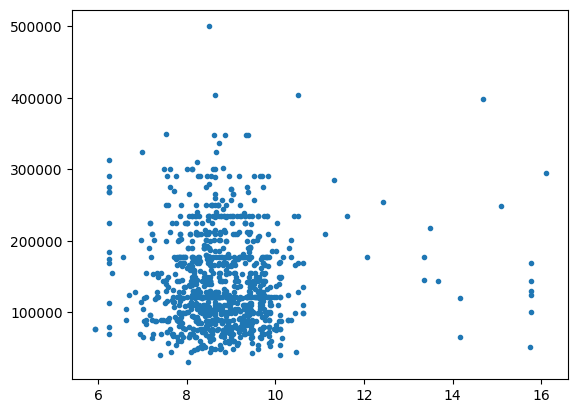

In [56]:
# visualize relation

import matplotlib.pyplot as plt

plot_data = vacancies_df_model.dropna(subset=['target', 'distance']).copy()

fig, ax = plt.subplots()

ax.plot(plot_data['distance'], plot_data['target'], linestyle='None', marker='.');

#### key_skills
1. Берем самые часто встречающиеся скиллы;
2. И делаем бинарными переменными переменными;

In [65]:
vacancies_df_model['key_skills']

0                                           [SQL, Python]
1                                                      []
2                                                      []
3                                                      []
4       [SQL, Power BI, MS PowerPoint, Работа с больши...
                              ...                        
1741    [Постановка задач разработчикам, Управление пр...
1742    [Работа с большим объемом информации, Аналитич...
1743    [BPMN, UML, Agile Project Management, Системны...
1744    [Atlassian Jira, Проведение тестирований, Анал...
1745    [Работа с большим объемом информации, MS Visio...
Name: key_skills, Length: 1734, dtype: object

In [67]:
skill_mapper = {
    'analytics': {'Аналитическое мышление', 'Анализ данных', 'Аналитика'}
}

skills_flatten = pd.Series([skill for skills in vacancies_df_model['key_skills'].tolist() for skill in skills])
skills_counts = skills_flatten.value_counts()

In [72]:
skills_counts.iloc[:25]

Аналитическое мышление                 308
SQL                                    249
Анализ данных                          230
Работа с большим объемом информации    196
Бизнес-анализ                          173
BPMN                                   153
Аналитика                              146
Системный анализ                       145
MS Excel                               144
Разработка технических заданий         135
UML                                    117
Постановка задач разработчикам         114
MS PowerPoint                          102
Сбор и анализ информации               102
Аналитические исследования              94
Работа с базами данных                  85
Моделирование бизнес процессов          85
Python                                  77
ERP-системы на базе 1С                  73
Анализ бизнес показателей               72
Анализ рынка                            70
MS SQL                                  67
Atlassian Jira                          66
Английский 

#### Нарисуем карту
1. Аналогично с картой России: https://habr.com/ru/articles/752406/;
2. Геоданные: https://gis-lab.info/qa/moscow-atd.html.

**Для карты нам нужно**

1. Нарисовать контуры МО по координатам;
2. Сопоставить вакансию с районом;
3. Агрегировать ЗП по районам;
4. Закрасить районы по цветам средней ЗП.

#### Обработка геоданных
Импорт датасета: